# Using Climate Data Store API

The Copernicus Climate Data Store API is a Python library to download data from the [Climate Data Store](https://cds.climate.copernicus.eu).

https://pypi.org/project/cdsapi/

You can install it using `conda`:
```
conda install -c conda-forge cdsapi
```

You need to add your api key into `~/.cdsapirc`.

## Init CDSAPI

In [1]:
import cdsapi

In [2]:
c = cdsapi.Client()

## Download CMIP6 data

In [3]:
c.retrieve(
    'projections-cmip6',
    {
        'temporal_resolution': 'monthly',
        'experiment': 'historical',
        'level': 'single_levels',
        'variable': 'near_surface_air_temperature',
        'model': 'mpi_esm1_2_hr',
        'date': '2000-01-01/2000-01-31',
        'area': [
            70, -40, -40,
            70,
        ],
        'format': 'zip',
    },
    'download.zip')

/usr/local/Caskroom/mambaforge/base/envs/cdsdemo/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cds.climate.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
2021-11-03 23:23:24,514 INFO Welcome to the CDS
2021-11-03 23:23:24,515 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/projections-cmip6
/usr/local/Caskroom/mambaforge/base/envs/cdsdemo/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cds.climate.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
2021-11-03 23:23:24,605 INFO Request is completed
2021-11-03 23:23:24,606 INFO Downloading https://download-0013.copern

Result(content_length=224695,content_type=application/zip,location=https://download-0013.copernicus-climate.eu/cache-compute-0013/cache/data8/adaptor.esgf_wps.retrieve-1635974529.4622192-26027-7-b7aca2d7-100b-4291-adc1-2e134c4c4bb9.zip)

## Use command line to extract downloaded data

In [4]:
!unzip -o download.zip 

Archive:  download.zip
 extracting: tas_Amon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_20000116-20000116_v20190710.nc  
 extracting: adaptor.esgf_wps.retrieve-1635974529.4622192-26027-7-b7aca2d7-100b-4291-adc1-2e134c4c4bb9_provenance.json  
 extracting: adaptor.esgf_wps.retrieve-1635974529.4622192-26027-7-b7aca2d7-100b-4291-adc1-2e134c4c4bb9_provenance.png  


## Use xarray to open CMIP6 data

In [5]:
import xarray as xr

In [6]:
ds = xr.open_dataset("tas_Amon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_20000116-20000116_v20190710.nc")
ds

<xarray.Dataset>
Dimensions:    (time: 1, bnds: 2, lat: 118, lon: 117)
Coordinates:
  * time       (time) datetime64[ns] 2000-01-16T12:00:00
  * lat        (lat) float64 -39.74 -38.81 -37.87 -36.93 ... 67.79 68.73 69.66
  * lon        (lon) float64 -39.38 -38.44 -37.5 -36.56 ... 67.5 68.44 69.38
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    contact:                cmip6-mpi-esm@dkrz.de
    ...                     ...
    title:                  MPI-ESM1-2-HR output prepared for CMIP6
    variable_id:            tas
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by MPI-M is licensed un...
    cmor_version:           3.5.0
    tracking_id:            hdl:21.14100/af75dd9f-d9c2-4e0e-a294-2bb0d5b740cf

## Plot CMIP6 data

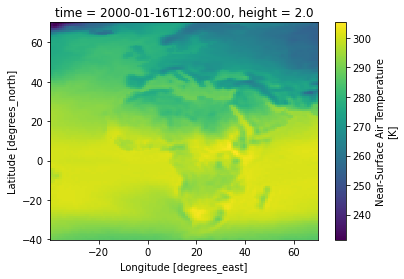

In [7]:
ds.tas.isel(time=0).plot()